## 가구점의 판매

In [1]:
import math
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
from matplotlib import pyplot
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

#Sats model: VARMAX
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.stattools import grangercausalitytests, adfuller


#Available to use NNs
import keras
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import *

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

2024-03-28 11:27:06.432768: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-28 11:27:06.502281: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-28 11:27:07.025930: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
df = pd.read_csv("/home/leejieun/workspace/kaggle-notebooks/datasets/zahraaalaatageldein/sales-for-furniture-store/Super_Store_data.csv", encoding='latin', header=0, parse_dates=True)

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [4]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2116,9963,CA-2015-168088,3/19/2015,3/22/2015,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
2117,9965,CA-2016-146374,12/5/2016,12/10/2016,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
2118,9981,US-2015-151435,9/6/2015,9/9/2015,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
2119,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
2120,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [6]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


In [7]:
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [8]:
df.shape

(2121, 21)

In [9]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [10]:
df["Ship Mode"].value_counts()

Ship Mode
Standard Class    1248
Second Class       427
First Class        327
Same Day           119
Name: count, dtype: int64

In [11]:
df["Segment"].value_counts()

Segment
Consumer       1113
Corporate       646
Home Office     362
Name: count, dtype: int64

Data Warngling

In [12]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Order Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2121 entries, 0 to 2120
Series name: Order Date
Non-Null Count  Dtype         
--------------  -----         
2121 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 16.7 KB


In [13]:
df.sort_values(by='Order Date', inplace=True)
df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1577,7475,CA-2014-167199,2014-01-06,1/10/2014,Standard Class,ME-17320,Maria Etezadi,Home Office,United States,Henderson,...,42420,South,FUR-CH-10004063,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,2573.820,9,0.00,746.4078
1626,7661,CA-2014-105417,2014-01-07,1/12/2014,Standard Class,VS-21820,Vivek Sundaresam,Consumer,United States,Huntsville,...,77340,Central,FUR-FU-10004864,Furniture,Furnishings,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",76.728,3,0.60,-53.7096
181,867,CA-2014-149020,2014-01-10,1/15/2014,Standard Class,AJ-10780,Anthony Jacobs,Corporate,United States,Springfield,...,22153,South,FUR-FU-10000965,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Ridgewood Wall ...",51.940,1,0.00,21.2954
150,717,CA-2014-130092,2014-01-11,1/14/2014,First Class,SV-20365,Seth Vernon,Consumer,United States,Dover,...,19901,East,FUR-FU-10000010,Furniture,Furnishings,"DAX Value U-Channel Document Frames, Easel Back",9.940,2,0.00,3.0814
631,2979,CA-2014-109232,2014-01-13,1/16/2014,Second Class,ND-18370,Natalie DeCherney,Consumer,United States,Mount Pleasant,...,29464,South,FUR-CH-10000422,Furniture,Chairs,Global Highback Leather Tilter in Burgundy,545.940,6,0.00,87.3504
1024,4939,CA-2014-157147,2014-01-13,1/18/2014,Standard Class,BD-11605,Brian Dahlen,Consumer,United States,San Francisco,...,94109,West,FUR-BO-10003034,Furniture,Bookcases,"O'Sullivan Elevations Bookcase, Cherry Finish",333.999,3,0.15,3.9294
1355,6475,CA-2014-149524,2014-01-14,1/15/2014,First Class,BS-11590,Brendan Sweed,Corporate,United States,Philadelphia,...,19140,East,FUR-BO-10003433,Furniture,Bookcases,Sauder Cornerstone Collection Library,61.960,4,0.50,-53.2856
200,971,CA-2014-115791,2014-01-16,1/18/2014,Second Class,DL-13315,Delfina Latchford,Consumer,United States,Philadelphia,...,19134,East,FUR-FU-10001095,Furniture,Furnishings,DAX Black Cherry Wood-Tone Poster Frame,127.104,6,0.20,28.5984
1131,5466,CA-2014-146591,2014-01-19,1/20/2014,First Class,TS-21340,Toby Swindell,Consumer,United States,Scottsdale,...,85254,West,FUR-BO-10001972,Furniture,Bookcases,O'Sullivan 4-Shelf Bookcase in Odessa Pine,181.470,5,0.70,-320.5970
1326,6328,CA-2014-167927,2014-01-20,1/26/2014,Standard Class,XP-21865,Xylona Preis,Consumer,United States,Westland,...,48185,Central,FUR-FU-10002918,Furniture,Furnishings,Eldon ClusterMat Chair Mat with Cordless Antis...,272.940,3,0.00,30.0234


In [14]:
df.set_index('Order Date', inplace=True)

In [17]:
data = df.drop(labels = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
                         'Postal Code', 'Product ID', 'Category','Product Name'], axis=1, inplace=True)
df.shape

(2121, 6)

In [18]:
df.head()

,Region,Sub-Category,Sales,Quantity,Discount,Profit
Order Date,,,,,,
2014-01-06,South,Chairs,2573.820,9,0.0,746.4078
2014-01-07,Central,Furnishings,76.728,3,0.6,-53.7096
2014-01-10,South,Furnishings,51.940,1,0.0,21.2954
2014-01-11,East,Furnishings,9.940,2,0.0,3.0814
2014-01-13,South,Chairs,545.940,6,0.0,87.3504


<Axes: xlabel='Order Date'>

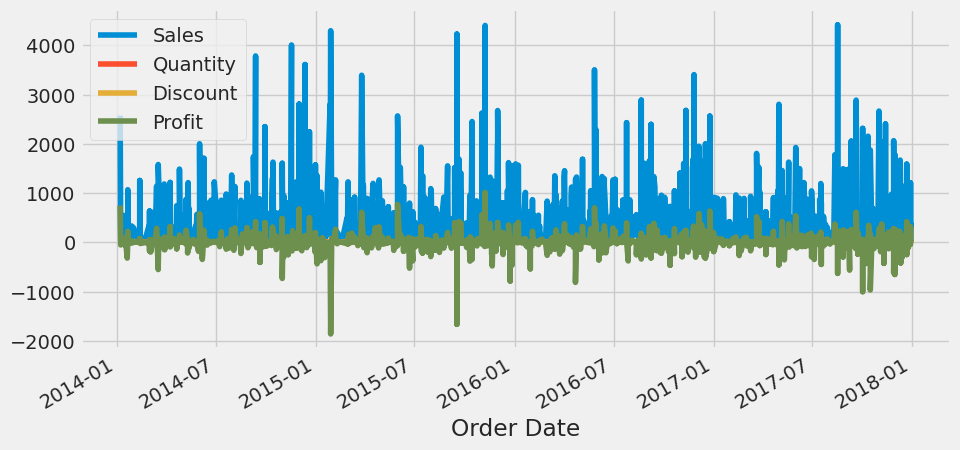

In [20]:
df.plot(figsize=(10, 5))

/tmp/ipykernel_969086/1793867126.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  Y_Sales = df['Sales'].resample('Y').mean()


<Axes: xlabel='Order Date'>

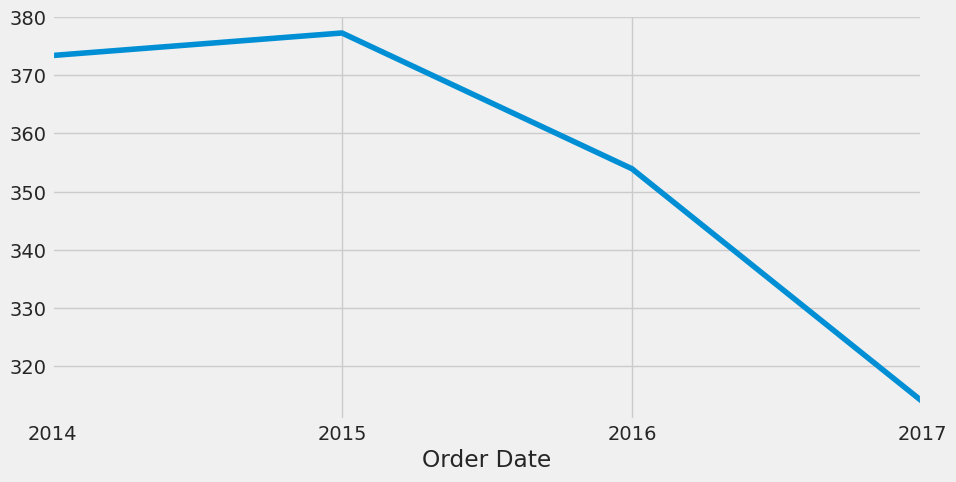

In [22]:
Y_Sales = df['Sales'].resample('Y').mean()

Y_Sales.plot(figsize=(10,5))

/tmp/ipykernel_969086/2309411335.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  Y_Profit = df['Profit'].resample('Y').mean()


<Axes: xlabel='Order Date'>

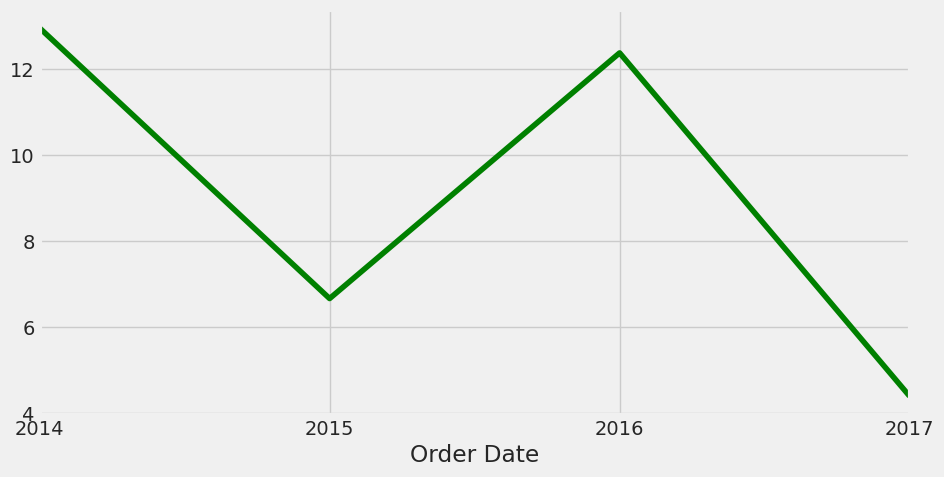

In [24]:
Y_Profit = df['Profit'].resample('Y').mean()
Y_Profit.plot(figsize=(10,5), c="g")

/tmp/ipykernel_969086/2217201970.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  Y_Quantity = df['Quantity'].resample('Y').mean()


<Axes: xlabel='Order Date'>

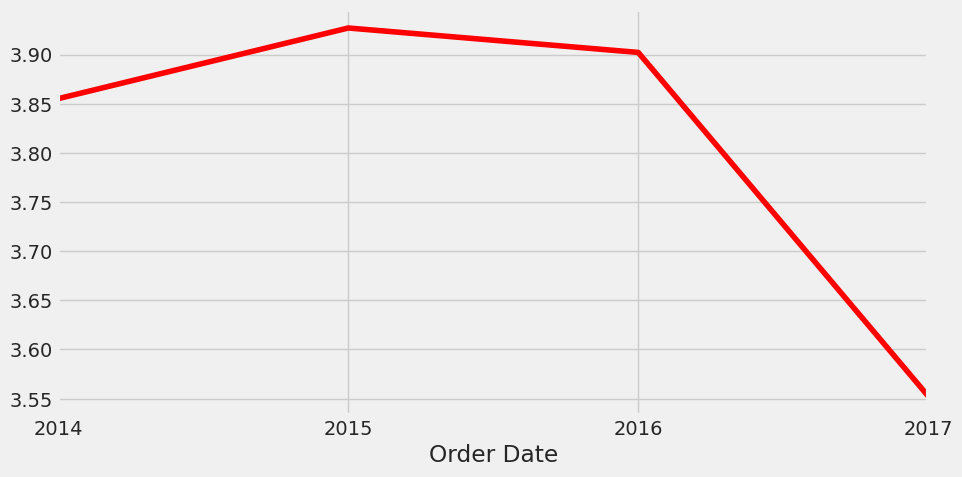

In [27]:
Y_Quantity = df['Quantity'].resample('Y').mean()
Y_Quantity.plot(figsize=(10,5), c="r")

/tmp/ipykernel_969086/673757299.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  Y_Discount = df['Discount'].resample('Y').mean()


<Axes: xlabel='Order Date'>

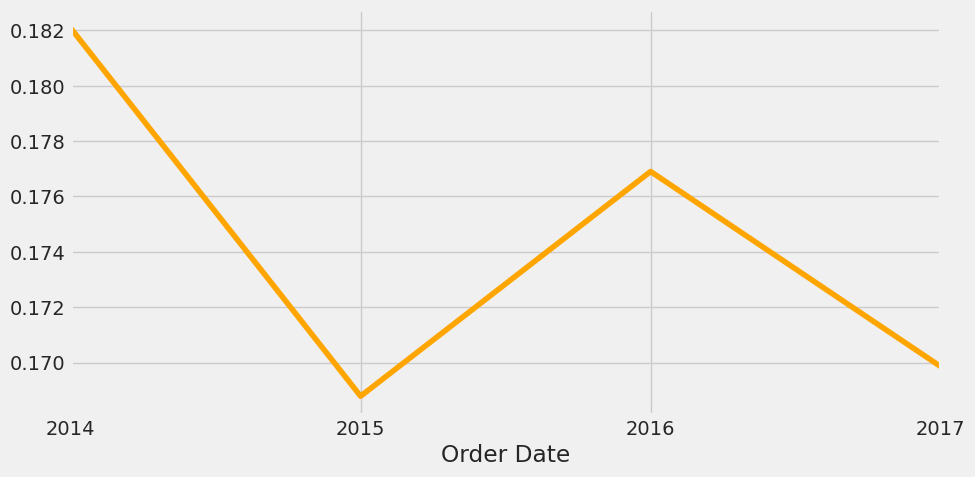

In [26]:
Y_Discount = df['Discount'].resample('Y').mean()
Y_Discount.plot(figsize=(10,5), c="orange")

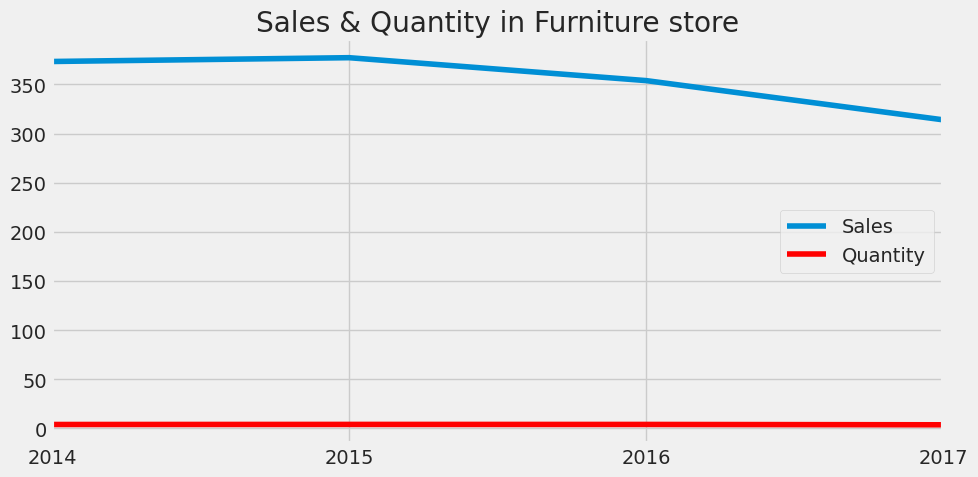

In [37]:
plt.figure(figsize=(10,5))
Y_Sales.plot()
Y_Quantity.plot(c='r')
plt.ylabel(None)
plt.xlabel(None)
plt.title("Sales & Quantity in Furniture store")
plt.legend(['Sales', 'Quantity'])
plt.tight_layout()
plt.show()